# Lasso Model

## Scaling and transformations
Now before proceeding to building the model I'm going to do the X/y split and scale/transform the data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/cleaned/6.jobs_in_data.csv')
df.head()

,work_year,job_title,job_category,employee_residence,experience_level,employment_type,work_setting,company_location,company_size,salary_in_euros,cost_of_living,purchasing_power,job_field
0,2023,Data DevOps Engineer,Data Engineering,Germany,2,4,1,Germany,L,87411,127.47,685.74,Data Engineering
1,2023,Data Architect,Data Architecture and Modeling,United States,3,4,3,United States,M,171120,143.34,1193.80,Data Engineering
2,2023,Data Architect,Data Architecture and Modeling,United States,3,4,3,United States,M,75256,143.34,525.02,Data Engineering
3,2023,Data Scientist,Data Science and Research,United States,3,4,3,United States,M,195040,143.34,1360.68,Data Science
4,2023,Data Scientist,Data Science and Research,United States,3,4,3,United States,M,85836,143.34,598.83,Data Science


## X/y Split
The target will be "salary_in_euros". I also want to drop the columns 'job_title' and 'job_category' because they are redundant for creating the model since I already added the column 'job_field' before with the categories that I want to work with.
(edit) After some trial and error testing I decided to drop the columns employee_residence and company_location since the high amount of unique values was influencing the performance of the model and causing overfitting. I dropped also purchasing power because that was a feature that I added from the target column for EDA purposes so it makes no sense in using it to predict the target value.

In [3]:
X = df.drop(columns=['job_title', 'salary_in_euros', 'purchasing_power'], axis=1)
y = df['salary_in_euros']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(4264, 10)

(1066, 10)

(4264,)

(1066,)

## Dividing X into numerical and categorical

In [6]:
X_train_num = X_train.select_dtypes(np.number)
X_train_cat = X_train.select_dtypes(object)
X_test_num = X_test.select_dtypes(np.number)
X_test_cat = X_test.select_dtypes(object)

In [7]:
X_train_num.head()

,work_year,experience_level,employment_type,work_setting,cost_of_living
2804,2023,3,4,3,143.34
3858,2023,3,4,3,143.34
511,2023,2,4,3,143.34
62,2023,3,4,3,143.34
3034,2023,3,4,2,143.34


In [8]:
X_test_num.head()

,work_year,experience_level,employment_type,work_setting,cost_of_living
1323,2023,3,4,3,143.34
1839,2023,3,4,3,143.34
798,2023,3,4,2,143.34
3856,2023,4,4,3,143.34
4553,2022,3,4,3,106.46


In [9]:
X_train_num.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,4264.0,2022.685038,0.603377,2020.00,2022.00,2023.00,2023.00,2023.00
experience_level,4264.0,2.656895,0.678589,1.00,2.00,3.00,3.00,4.00
employment_type,4264.0,3.984522,0.183138,1.00,4.00,4.00,4.00,4.00
work_setting,4264.0,2.505629,0.565209,1.00,2.00,3.00,3.00,3.00
cost_of_living,4264.0,139.699977,15.292912,27.37,143.34,143.34,143.34,197.89


## Scaling numerical features
Since the numerical features have very different ranges I'm going to use the Standard Scaler.

In [10]:
from sklearn.preprocessing import MinMaxScaler
import pickle

scaler = MinMaxScaler()
scaler.fit(X_train_num)

path = "../ml/scalers/"
scaler_file_name = "MinMaxScaler.pkl"

with open(path + scaler_file_name, "wb") as file:
    pickle.dump(scaler, file)

X_train_num_transformed = scaler.transform(X_train_num)
X_test_num_transformed = scaler.transform(X_test_num)

In [11]:
# from sklearn.preprocessing import StandardScaler
# import pickle

# scaler = StandardScaler()
# scaler.fit(X_train_num)

# path = "../ml/scalers/"
# scaler_file_name = "standard_scaler.pkl"

# with open(path + scaler_file_name, "wb") as file:
#     pickle.dump(scaler, file)

# X_train_num_transformed = scaler.transform(X_train_num)
# X_test_num_transformed = scaler.transform(X_test_num)

In [12]:
X_train_num_transformed_df = pd.DataFrame(X_train_num_transformed, columns=X_train_num.columns , index=X_train_num.index)
X_test_num_transformed_df = pd.DataFrame(X_test_num_transformed, columns=X_test_num.columns , index=X_test_num.index)

In [13]:
X_train_num_transformed_df.head()

,work_year,experience_level,employment_type,work_setting,cost_of_living
2804,1.0,0.666667,1.0,1.0,0.680096
3858,1.0,0.666667,1.0,1.0,0.680096
511,1.0,0.333333,1.0,1.0,0.680096
62,1.0,0.666667,1.0,1.0,0.680096
3034,1.0,0.666667,1.0,0.5,0.680096


In [14]:
X_test_num_transformed_df.head()

,work_year,experience_level,employment_type,work_setting,cost_of_living
1323,1.000000,0.666667,1.0,1.0,0.680096
1839,1.000000,0.666667,1.0,1.0,0.680096
798,1.000000,0.666667,1.0,0.5,0.680096
3856,1.000000,1.000000,1.0,1.0,0.680096
4553,0.666667,0.666667,1.0,1.0,0.463817


## Encoding categorical features

In [15]:
X_train_cat.head()

,job_category,employee_residence,company_location,company_size,job_field
2804,Leadership and Management,United States,United States,M,Data Engineering
3858,Data Science and Research,United States,United States,M,Data Science
511,Data Analysis,United States,United States,M,Data Analysis
62,Data Science and Research,United States,United States,M,Data Science
3034,Data Science and Research,United States,United States,M,Data Science


In [16]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(X_train_cat)

path = "../ml/encoders/"
encoder_file_name = "one_hot_encoder.pkl"

with open(path + encoder_file_name, "wb") as file:
    pickle.dump(encoder, file)

X_train_cat_encoded = encoder.transform(X_train_cat).toarray()
X_test_cat_encoded = encoder.transform(X_test_cat).toarray()

In [17]:
encoded_feature_names = encoder.get_feature_names_out(X_train_cat.columns)

X_train_cat_encoded_df = pd.DataFrame(X_train_cat_encoded, columns=encoded_feature_names, index=X_train_cat.index)
X_test_cat_encoded_df = pd.DataFrame(X_test_cat_encoded, columns=encoded_feature_names, index=X_test_cat.index)

In [18]:
X_train_cat_encoded_df.head()

,job_category_BI and Visualization,job_category_Cloud and Database,job_category_Data Analysis,job_category_Data Architecture and Modeling,job_category_Data Engineering,job_category_Data Management and Strategy,job_category_Data Quality and Operations,job_category_Data Science and Research,job_category_Leadership and Management,job_category_Machine Learning and AI,...,company_location_United Arab Emirates,company_location_United Kingdom,company_location_United States,company_size_L,company_size_M,company_size_S,job_field_Data Analysis,job_field_Data Engineering,job_field_Data Science,job_field_Other
2804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
511,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [19]:
X_test_cat_encoded_df.head()

,job_category_BI and Visualization,job_category_Cloud and Database,job_category_Data Analysis,job_category_Data Architecture and Modeling,job_category_Data Engineering,job_category_Data Management and Strategy,job_category_Data Quality and Operations,job_category_Data Science and Research,job_category_Leadership and Management,job_category_Machine Learning and AI,...,company_location_United Arab Emirates,company_location_United Kingdom,company_location_United States,company_size_L,company_size_M,company_size_S,job_field_Data Analysis,job_field_Data Engineering,job_field_Data Science,job_field_Other
1323,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
798,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4553,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [20]:
X_train_concat = pd.concat([X_train_num_transformed_df, X_train_cat_encoded_df], axis=1)
X_train_concat

,work_year,experience_level,employment_type,work_setting,cost_of_living,job_category_BI and Visualization,job_category_Cloud and Database,job_category_Data Analysis,job_category_Data Architecture and Modeling,job_category_Data Engineering,...,company_location_United Arab Emirates,company_location_United Kingdom,company_location_United States,company_size_L,company_size_M,company_size_S,job_field_Data Analysis,job_field_Data Engineering,job_field_Data Science,job_field_Other
2804,1.000000,0.666667,1.0,1.0,0.680096,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3858,1.000000,0.666667,1.0,1.0,0.680096,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
511,1.000000,0.333333,1.0,1.0,0.680096,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
62,1.000000,0.666667,1.0,1.0,0.680096,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3034,1.000000,0.666667,1.0,0.5,0.680096,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,1.000000,0.666667,1.0,1.0,0.680096,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3772,1.000000,0.666667,1.0,0.5,0.680096,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5191,0.333333,0.666667,1.0,0.5,0.452557,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5226,0.333333,0.000000,1.0,0.0,0.680096,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
X_test_concat = pd.concat([X_test_num_transformed_df, X_test_cat_encoded_df], axis=1)
X_test_concat

,work_year,experience_level,employment_type,work_setting,cost_of_living,job_category_BI and Visualization,job_category_Cloud and Database,job_category_Data Analysis,job_category_Data Architecture and Modeling,job_category_Data Engineering,...,company_location_United Arab Emirates,company_location_United Kingdom,company_location_United States,company_size_L,company_size_M,company_size_S,job_field_Data Analysis,job_field_Data Engineering,job_field_Data Science,job_field_Other
1323,1.000000,0.666667,1.0,1.0,0.680096,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1839,1.000000,0.666667,1.0,1.0,0.680096,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
798,1.000000,0.666667,1.0,0.5,0.680096,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3856,1.000000,1.000000,1.0,1.0,0.680096,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4553,0.666667,0.666667,1.0,1.0,0.463817,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2841,1.000000,0.333333,1.0,0.5,0.147666,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5208,0.000000,0.333333,1.0,1.0,0.488388,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1965,1.000000,0.666667,1.0,0.5,0.680096,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4538,0.666667,0.333333,1.0,0.5,0.680096,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
from sklearn.model_selection import GridSearchCV

alpha = [20,30,40]
max_iter = [80, 100, 120]
tol = [0.1, 0.2, 0,3]
selection = ['cyclic', 'random']

grid = {'alpha': alpha,
        'max_iter': max_iter,
        'tol': tol,
        'selection': selection,
       }


In [23]:
from sklearn.linear_model import Lasso
import os

lasso_reg = Lasso()

path = "../ml/models/"
isExist = os.path.exists(path)
if not isExist:
    os.makedirs(path)
    print("The new directory is created!")

    filename = "Lasso.pkl"
    with open(path+filename, "wb") as file:
        pickle.dump(lasso_reg, file)

In [24]:
grid_search = GridSearchCV(estimator = lasso_reg, param_grid = grid, cv = 10)
grid_search.fit(X_train_concat, y_train)

/Users/tiagomartins/Desktop/Ironhack/Week_9/Final_project/pip/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.375e+10, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/tiagomartins/Desktop/Ironhack/Week_9/Final_project/pip/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.161e+10, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/tiagomartins/Desktop/Ironhack/Week_9/Final_project/pip/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might wa

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [20, 30, 40], 'max_iter': [80, 100, 120],
                         'selection': ['cyclic', 'random'],
                         'tol': [0.1, 0.2, 0, 3]})

In [25]:
grid_search.best_params_

{'alpha': 40, 'max_iter': 80, 'selection': 'random', 'tol': 0.1}

In [26]:
print("The best R2 for the best hyperparameters is {:.2f}".format(grid_search.best_score_))
print("The performace of the Lasso using the best gridsearchcv hyperpameters is {:.2f}".format(grid_search.best_estimator_.score(X_test_concat, y_test)))


The best R2 for the best hyperparameters is 0.34
The performace of the Lasso using the best gridsearchcv hyperpameters is 0.38


In [27]:
import os

lasso_reg = Lasso(alpha=30, max_iter=100, selection='random', tol=0.1)

lasso_reg.fit(X_train_concat, y_train)

path = "../ml/models/"
isExist = os.path.exists(path)
if not isExist:
    os.makedirs(path)
    print("The new directory is created!")

    filename = "Lasso.pkl"
    with open(path+filename, "wb") as file:
        pickle.dump(lasso_reg, file)

In [28]:
y_train_pred = lasso_reg.predict(X_train_concat)
y_test_pred  = lasso_reg.predict(X_test_concat)

In [31]:
y_test_pred

array([152968.54285514, 166060.53287971, 149487.90340321, ...,
       177880.06236652, 150246.05579461,  73666.84971446])

In [29]:
import functions

functions.error_metrics_report(y_train, y_test, y_train_pred, y_test_pred)

,Metric,Train,Test
0,MAE,37901.59,36073.51
1,MSE,2489108494.77,2084925197.11
2,RMSE,49890.97,45660.98
3,R2,0.35,0.38


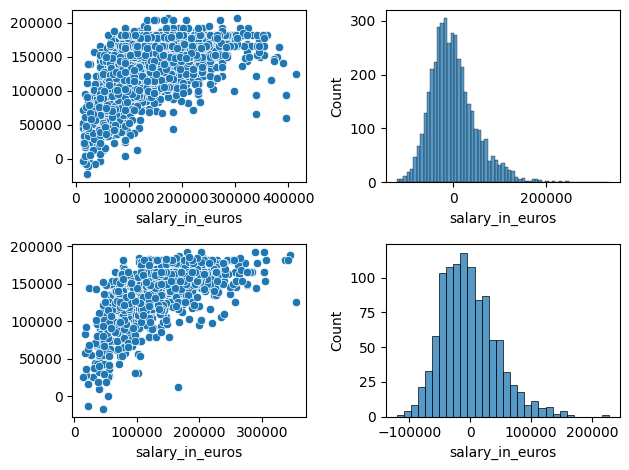

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(2,2)
sns.scatterplot(x=y_train, y=y_train_pred, ax=ax[0,0])
sns.histplot(y_train - y_train_pred, ax=ax[0,1])
sns.scatterplot(x=y_test, y=y_test_pred, ax=ax[1,0])
sns.histplot(y_test - y_test_pred, ax=ax[1,1])
plt.tight_layout()
plt.show()

### Conclusion:
